In [28]:
# Importer les packages pour cnn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [29]:
# Chargement de la bd
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


[4]


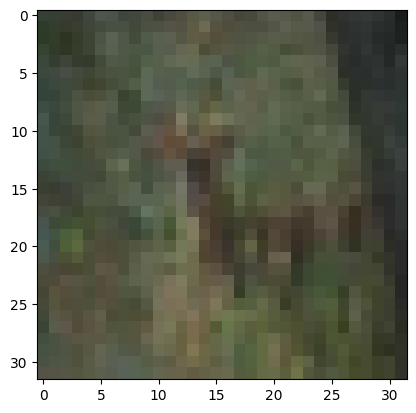

In [30]:
# visualiser les images
plt.imshow(x_train[10])
print(y_train[10])


In [31]:
# Normaliser les images
x_train = x_train / 255.0
x_test = x_test / 255.0


In [32]:
x_train.shape

(50000, 32, 32, 3)

In [33]:
# creer le model
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(x_train.shape[1:])))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [34]:
# Ajouter une autre couche
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [35]:
# aligner les images
model.add(Flatten())
model.add(Dense(64))


In [36]:
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
# faire une synthese
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,187,786 (4.53 MB)

 Trainable params: 1,187,786 (4.53 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#  entrainer le model
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 776s 496ms/step - accuracy: 0.4374 - loss: 1.5574
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 801s 495ms/step - accuracy: 0.6120 - loss: 1.1135
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 803s 496ms/step - accuracy: 0.6590 - loss: 0.9789
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 770s 493ms/step - accuracy: 0.6852 - loss: 0.8997
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 800s 492ms/step - accuracy: 0.7048 - loss: 0.8460


In [40]:
# evaluer le model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.6795 - loss: 0.9206
0.920760452747345 0.6797000169754028
